In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
shap = np.load('/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning/results/gnn_transformer/prognosis_mix_hb/pretreatment_response/ten_itr_shap.npy')

In [4]:
def get_channel_index_of_region(ch_name):
    return np.array([int(ch_name[1:])-1 for ch_name in ch_name])

# Posterior superior frontal cortex
# PSFC_ch = ['C9', 'C10', 'C20', 'C21', 'C1', 'C2', 'C11', 'C12'] # 
left_PSFC_location = ['C9', 'C10', 'C20', 'C21']
right_PSFC_location = ['C1', 'C2', 'C11', 'C12']

# Dorsolateral prefrontal cortex
# DPC_ch = ['C7','C8', 'C17', 'C18', 'C19', 'C28', 'C29', 'C3', 'C4', 'C13', 'C14', 'C15', 'C24', 'C25']
left_DPC_location = ['C7','C8', 'C17', 'C18', 'C19', 'C28', 'C29']
right_DPC_location = ['C3', 'C4', 'C13', 'C14', 'C15', 'C24', 'C25']

#Superior temporal gyrus
# STG_ch = ['C22', 'C23', 'C32', 'C33', 'C43', 'C44', 'C30', 'C31', 'C41', 'C42', 'C51', 'Cnum_of_region'] #
left_STG_location = ['C22', 'C23', 'C32', 'C33', 'C43', 'C44']
right_STG_location = ['C30', 'C31', 'C41', 'C42', 'C51', 'C52']

# Ventrolateral prefrontal cortex
# VPC_ch = ['C34', 'C35', 'C45', 'C46','C39', 'C40', 'C49', 'C50'] # 
left_VPC_location = ['C34', 'C35', 'C45', 'C46']
right_VPC_location = ['C39', 'C40', 'C49', 'C50']

# Medial prefrontal cortex
MPC_location = ['C5', 'C6', 'C16', 'C26', 'C27', 'C36', 'C37', 'C38', 'C47', 'C48']  
nine_region_name = ['L-PSFC', 'R-PSFC', 'L-DPC', 'R-DPC', 'L-STG', 'R-STG', 'L-VPC', 'R-VPC', 'MPC']

all_region_location = [left_PSFC_location, right_PSFC_location, left_DPC_location, right_DPC_location, left_STG_location, right_STG_location, left_VPC_location, right_VPC_location, MPC_location]
all_region_location = [get_channel_index_of_region(i) for i in all_region_location]


0.0021411954058291327
p-value:  0.885789636854412
0.2580159032848979
p-value:  2.5494843192374824e-13
-0.0487010440076541
p-value:  4.089841941447757e-06
-0.15030895219089752
p-value:  3.942124324908773e-12
Corrected p-value for region 1 : 0.885789636854412
There is no significant difference between shap_left and shap_right.
Corrected p-value for region 2 : 1.019793727694993e-12
There is a significant difference between shap_left and shap_right.
Corrected p-value for region 3 : 5.453122588597009e-06
There is a significant difference between shap_left and shap_right.
Corrected p-value for region 4 : 7.884248649817547e-12
There is a significant difference between shap_left and shap_right.


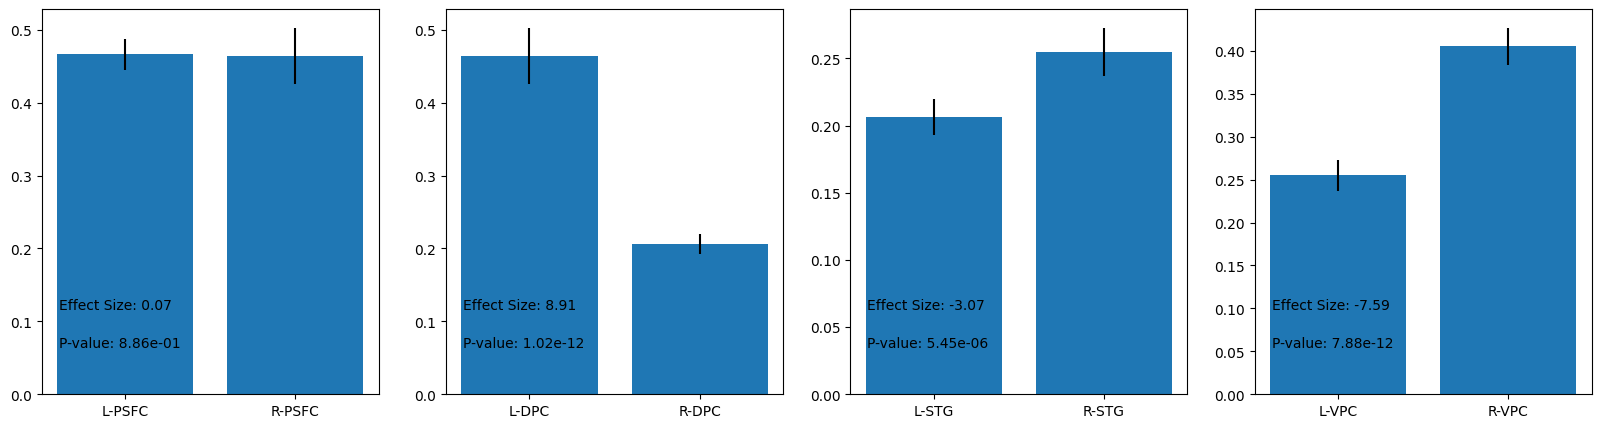

In [16]:
from scipy.stats import ttest_ind
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
all_region_location

all_p_values = []
mean_differences = []
all_effect_size = []
shap = shap / np.max(shap)
four_regions = ['PSFC', 'DPC', 'STG', 'VPC']

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for i in range(4):
    region_left = all_region_location[i]
    region_right = all_region_location[i+1]

    shap_left = shap[:, region_left].mean(axis=1)
    shap_right = shap[:, region_right].mean(axis=1)
    
    # Calculate and store the mean difference
    mean_difference = np.mean(shap_left) - np.mean(shap_right)
    shap_left_std = np.std(shap_left)
    shap_right_std = np.std(shap_right)
    pooled_std = np.sqrt((shap_left_std**2 + shap_right_std**2) / 2)
    effect_size = mean_difference / pooled_std
    all_effect_size.append(effect_size)    

    print(mean_difference)
    # Perform t-test
    t_stat, p_value = ttest_ind(shap_left, shap_right)
    all_p_values.append(p_value)
    print('p-value: ', p_value)
    
    # plot 
    
    x_label_name = ['L-'+four_regions[i], 'R-'+four_regions[i]]
    ax[i].bar(x_label_name, [shap_left.mean(), shap_right.mean()], yerr=[shap_left.std(), shap_right.std()])

        
# Correct p-values using FDR
rejected, corrected_p_values, _, _ = multipletests(all_p_values, method='fdr_bh')

for i, p_value in enumerate(corrected_p_values):
    print('Corrected p-value for region', i+1, ':', p_value)
    # Check if there is a significant difference
    if p_value < 0.05:
        print("There is a significant difference between shap_left and shap_right.")
    else:
        print("There is no significant difference between shap_left and shap_right.")

        # Add effect size and corrected p-values to the plot
    ax[i].text(0.05, 0.25, f'Effect Size: {all_effect_size[i]:.2f}', transform=ax[i].transAxes, va='top')
    ax[i].text(0.05, 0.15, f'P-value: {p_value:.2e}', transform=ax[i].transAxes, va='top')    
